# House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.model_selection import KFold

In [2]:
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
df_train.shape

(1460, 81)

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [5]:
col_dtypes = {"dtypes": df_train.dtypes}
pd.DataFrame(col_dtypes)

,dtypes
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object


# Numerical Feature Selection

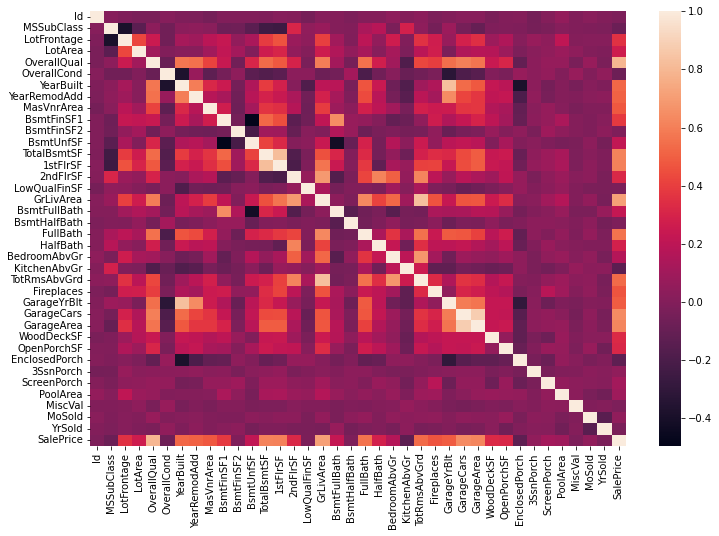

In [6]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(df_train.corr())
plt.show()

* Selecting features which have high correlation with the response variable SalePrice.
* The features are - OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea.
* These are only numerical features.

In [7]:
num_col = ["OverallQual", "YearBuilt", "YearRemodAdd", "MasVnrArea", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "SalePrice"]
df_num = df_train[num_col]
df_num.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000


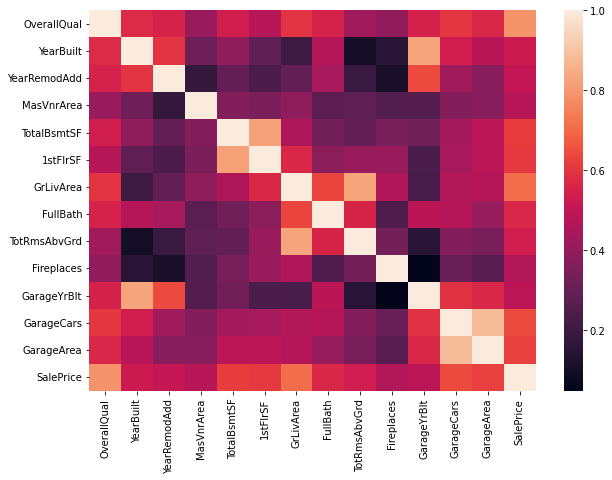

In [8]:
fig = plt.figure(figsize = (10, 7))
sns.heatmap(df_num.corr())
plt.show()

* Multicollinearity exists between features - (1stFlrSF and TotalBsmtSF), (GarageYrBlt and YearBuilt), (TotRmsAbvGrd, GrLivArea), (GarageArea, GarageCars)
* Features to be removed - 1stFlrSF, GarageYrBlt, TotRmsAbvGrd, GarageArea

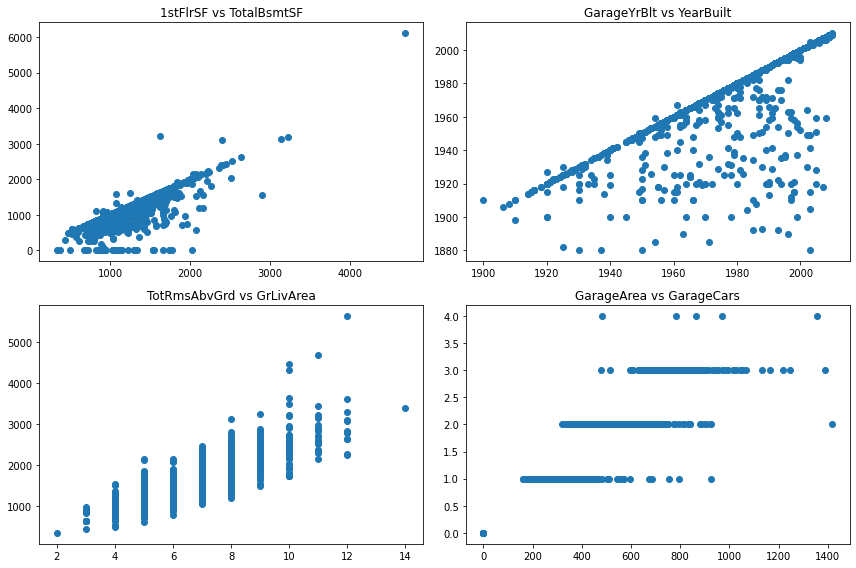

In [9]:
fig = plt.figure(figsize=(12, 8))
plot1 = plt.subplot2grid((2,2),(0,0))
plot2 = plt.subplot2grid((2,2),(0,1))
plot3 = plt.subplot2grid((2,2),(1,0))
plot4 = plt.subplot2grid((2,2),(1,1))

plot1.scatter(df_num["1stFlrSF"], df_num["TotalBsmtSF"])
plot1.set_title("1stFlrSF vs TotalBsmtSF")

plot2.scatter(df_num["GarageYrBlt"], df_num["YearBuilt"])
plot2.set_title("GarageYrBlt vs YearBuilt")

plot3.scatter(df_num["TotRmsAbvGrd"], df_num["GrLivArea"])
plot3.set_title("TotRmsAbvGrd vs GrLivArea")

plot4.scatter(df_num["GarageArea"], df_num["GarageCars"])
plot4.set_title("GarageArea vs GarageCars")

plt.tight_layout()
plt.show()

In [10]:
# Dropping Collinear features
coll_features = ["1stFlrSF", "GarageYrBlt", "TotRmsAbvGrd", "GarageArea"]
df_num_final = df_num.drop(coll_features, axis=1)
df_num_final.head(10)

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageCars,SalePrice
0,7,2003,2003,196.0,856,1710,2,0,2,208500
1,6,1976,1976,0.0,1262,1262,2,1,2,181500
2,7,2001,2002,162.0,920,1786,2,1,2,223500
3,7,1915,1970,0.0,756,1717,1,1,3,140000
4,8,2000,2000,350.0,1145,2198,2,1,3,250000
5,5,1993,1995,0.0,796,1362,1,0,2,143000
6,8,2004,2005,186.0,1686,1694,2,1,2,307000
7,7,1973,1973,240.0,1107,2090,2,2,2,200000
8,7,1931,1950,0.0,952,1774,2,2,2,129900
9,5,1939,1950,0.0,991,1077,1,2,1,118000


# Categorical Feature Selection, Data Storytelling

In [11]:
df_cat = df_train.select_dtypes(include="object")
df_cat.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


**MSZoning**

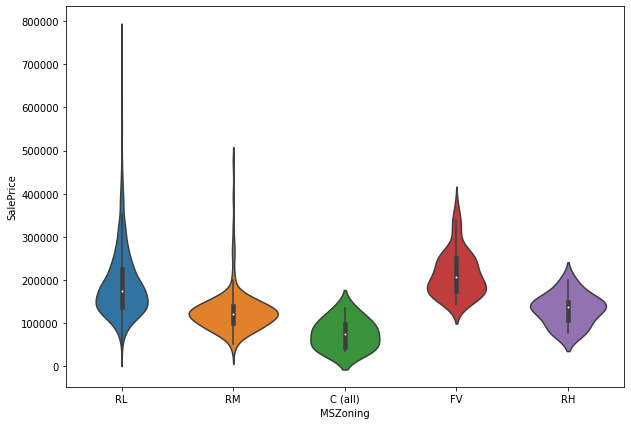

In [12]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(y = df_train["SalePrice"], x = df_train["MSZoning"])
plt.show()

In [13]:
df_cat["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

* MSZoning tells the Genral Zoning of the house.
* The Residential Area with Low density, Medium Density tend to have higher house prices.
* The Commercial Area tend to have lower House Prices.

**Street**

In [14]:
df_cat["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

* Street gives the type of road access to property.
* The analysis of this feature can not be conducted because the number of houses with Gravel alley is very small.
* This feature will be not be used, because most of the values of this feature is "Pave".

**Alley**

In [15]:
df_cat["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [16]:
df_cat["Alley"].isnull().sum()

1369

In [17]:
df_cat.loc[:, "Alley"].fillna("No Alley", inplace=True)
df_cat["Alley"].isnull().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

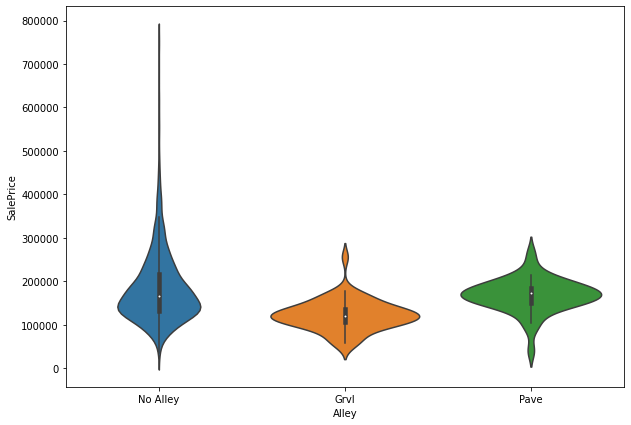

In [18]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["Alley"], y=df_train["SalePrice"])

* Alley tells the type of alley which has access to property.
* There can be Gravel (Alley covered with small pebbles and stones), Paved (Alley with flat surface) and No Alley.
* The Houses with Gravel alley tend to have low prices than Houses with Paved alley.
* The NULL values in Alley is filled by "No Alley" as indicated in data_description.

**LotShape**

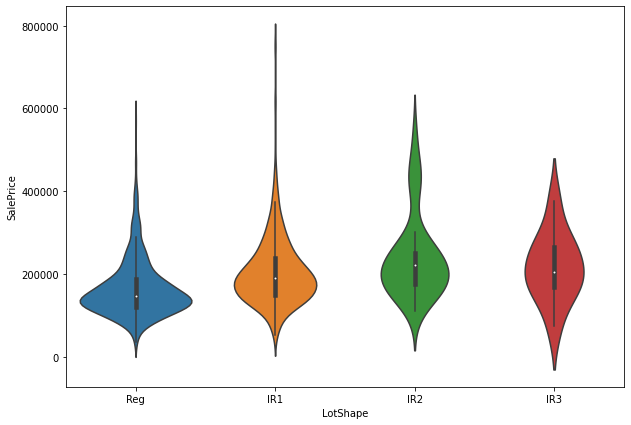

In [19]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x = df_cat["LotShape"], y=df_train["SalePrice"])
plt.show()

In [20]:
df_cat["LotShape"].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

* LotShape tells the irregularities in the shape of the house.
* The Price of houses with slight irregularities and moderate irregularities have high prices.
* Regular shape houses also have high prices.
* Completly irregular houses have lowest prices

**LandContour**

In [21]:
df_cat["LandContour"].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

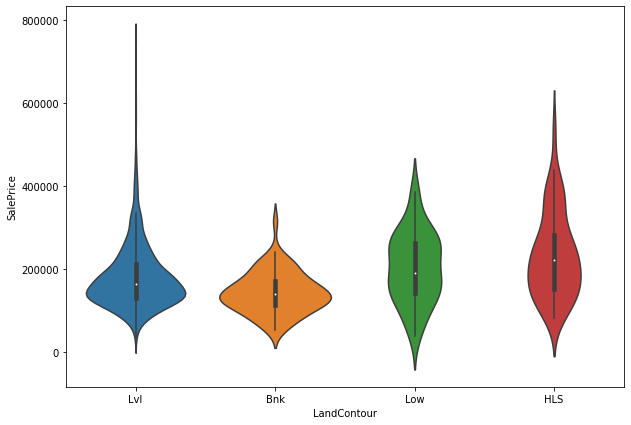

In [22]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["LandContour"], y=df_train["SalePrice"])
plt.show()

* LandContour gives flatness of the property.
* The houses with complete flatness and located on hills have high prices.

**Utilities**

In [23]:
df_cat["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

* Utilities tells the type of utilities available to the house (Electricity, Gas, Water)
* Every house given in the dataset have all the utilities
* This features will not be used. 

**LotConfig**

In [24]:
df_cat["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

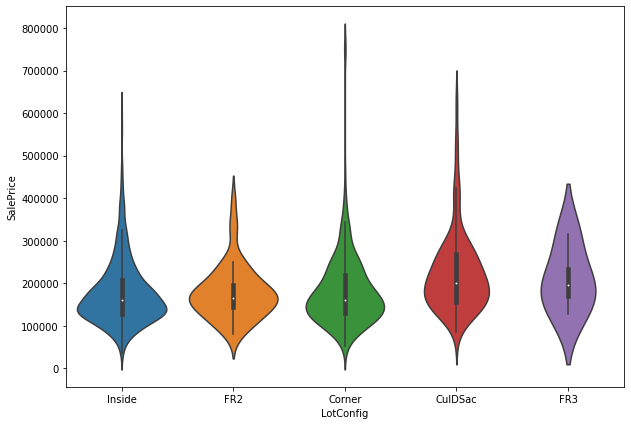

In [25]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["LotConfig"], y=df_train["SalePrice"])
plt.show()

* LotConfig gives the lot configuration
* Cul-de-sac, Inside lot, and corner lot have high prices.
* Frontage lot have low prices

**LandSlope**

In [26]:
df_cat["LandSlope"].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

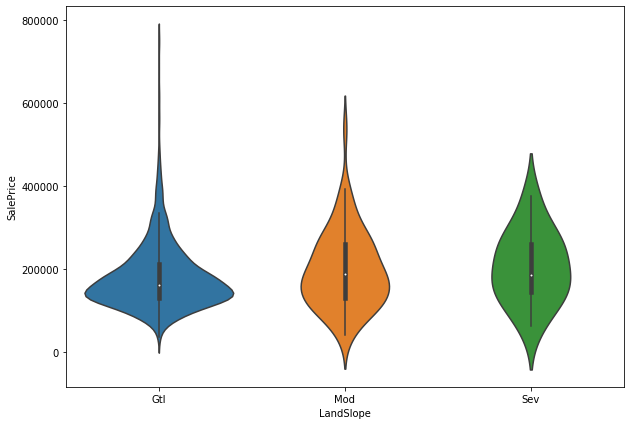

In [27]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["LandSlope"], y=df_train["SalePrice"])
plt.show()

* LandSlope gives the slope of the property.
* The similar feature to this is LotShape. So I will not use this variable.
* Also the number of houses which have severe slope is very less.
* The SalePrice value is also similar to LotShape (Gentle Slope have higher price than Severe Slope)

**Neighborhood**

In [28]:
df_cat["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

* Neighborhood tells the neighborhood of the house in LosAngeles
* This feature will be removed, because only limited number of neighborhoods are given, and a house in test set can belong to any neighborhood.

**Condition1 and Condition2**

In [29]:
df_cat["Condition1"].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [30]:
df_cat["Condition2"].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

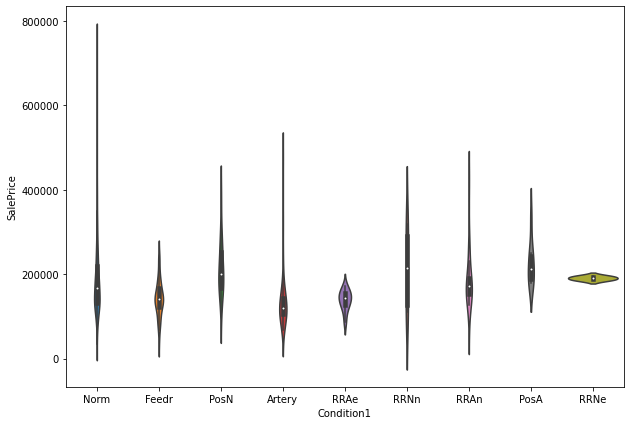

In [31]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["Condition1"], y=df_train["SalePrice"])
plt.show()

* Condition1 and Condition2 tells the proximity of house to different conditions.
* Both of these variables will be removed, because there are very small number of houses in most of the conditions.
* The house located at proximity of normal conditions have high prices. 

**BldgType**

In [32]:
df_cat["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

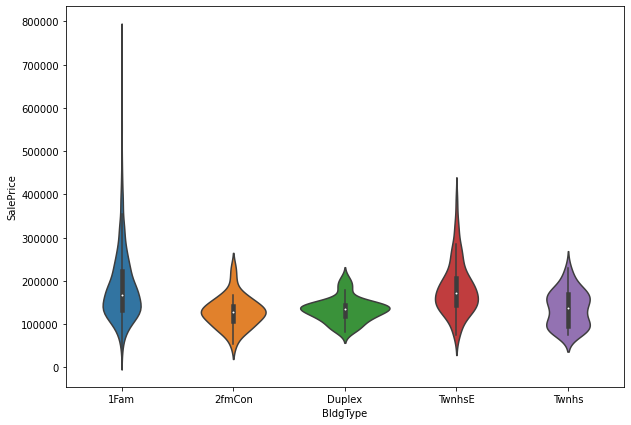

In [33]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["BldgType"], y=df_train["SalePrice"])
plt.show()

* BldgType gives the type of the house.
* Single family, detached house have high price, Townhouse with end unit have moderate prices.
* Two family conversion, Duplex and Townhouse inside unit have low prices.

**HouseStyle**

In [34]:
df_cat["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

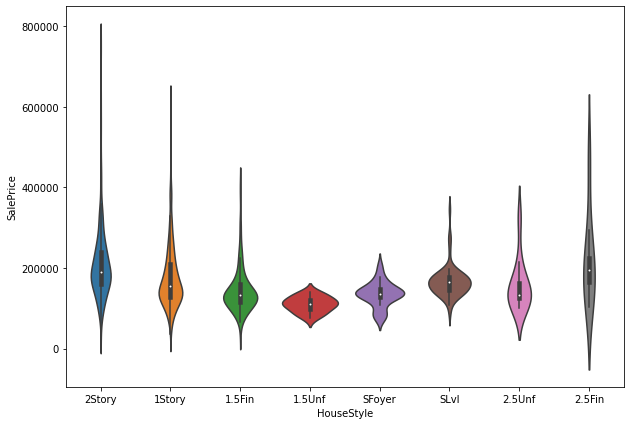

In [35]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["HouseStyle"], y=df_train["SalePrice"])
plt.show()

* HouseStyle tells the type of house.
* Two Story, One Story and Two and a half story (Finished) houses have high price.
* One and a half story (Finished), Split Level, Two and a half story (Unfinished) housed have moderate price.
* Houses with one and a half (Unfinished), and Split Foyer have low price.

**RoofStyle and RoofMatl**

In [36]:
df_cat["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [37]:
df_cat["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

* RoofStyle tells the style of the roof of the house.
* RoofMatl tells the material used for the roof of the house
* These features will not be used because, it has very low number of houses with certain style of roofs.

**Exterior1st and Exterior2nd**

In [38]:
df_cat["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [39]:
df_cat["Exterior2nd"].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

* Exterior1st and Exterior2nd (if more than one) tells the material used in the exterior of the house.
* These features will be removed, because in the dataset there are features (like Exterior Condition and Exterior Quality) which will cover these features.

**MasVnrType**

In [40]:
df_cat["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [41]:
df_cat["MasVnrType"].isnull().sum()

8

In [42]:
df_cat.loc[:, "MasVnrType"].fillna("None", inplace=True)
df_cat["MasVnrType"].isnull().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

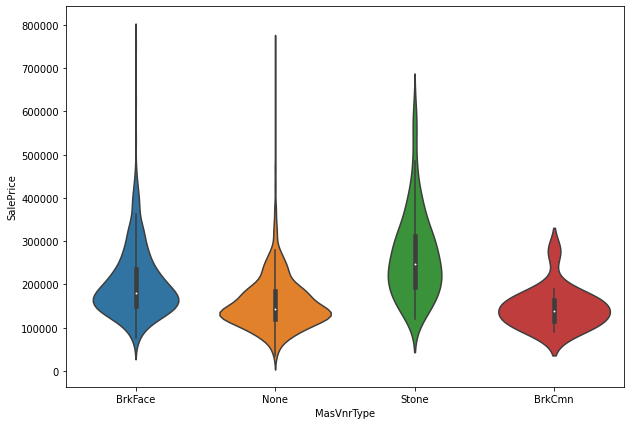

In [43]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["MasVnrType"], y=df_train["SalePrice"])
plt.show()

* MasVnrType tells the Masonry Veneer type.
* Masonry Veneer type of Brick Face, Stone and Houses with no type of Masonry Veneer have high house prices.
* Masonry Veneer type of Brick Common has low house prices.

**ExterQual And ExterCond**

In [44]:
df_cat["ExterQual"].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [45]:
df_cat["ExterCond"].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

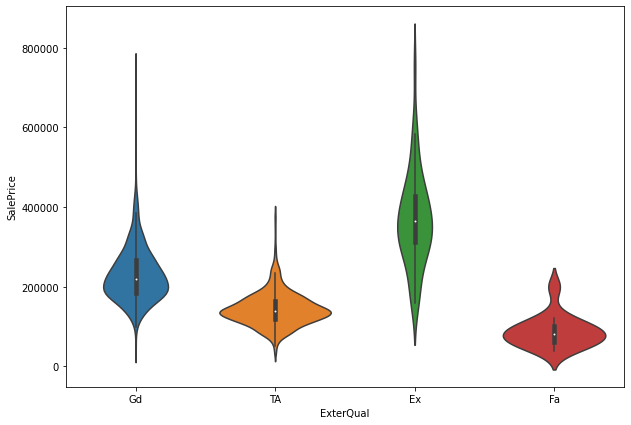

In [46]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["ExterQual"], y=df_train["SalePrice"])
plt.show()

* ExterQual evaluates the quality of the material on the exterior.
* Excellent and Good quality have high prices.
* Typical/Average quality has moderate prices.
* Fair quality has low prices
* ExterCond will not be used because almost all the houses have typical external condition.

**Foundation**

In [47]:
df_cat["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

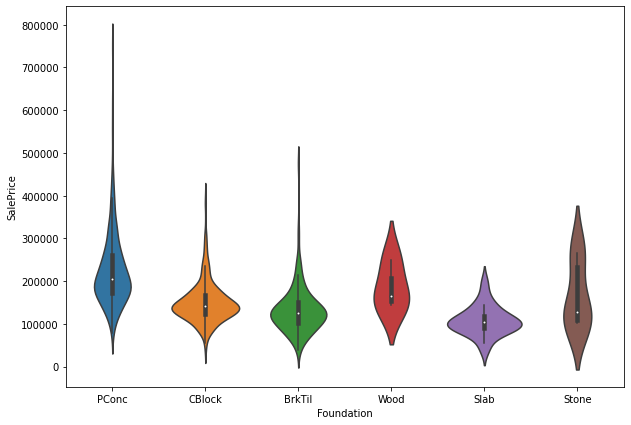

In [48]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["Foundation"], y=df_train["SalePrice"])
plt.show()

* Foundation tells the type of foundation used in the house.
* Houses with Poured Contrete type of foundation have high prices.
* Houses with Cinder Block and Brick & Tile type of foundation have moderate prices.
* Houses with Wood, Stone and Slab type of foundation have low prices.

**BsmtQual, BsmtCond**

In [49]:
df_cat["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [50]:
df_cat["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [51]:
df_cat["BsmtQual"].isnull().sum()

37

In [52]:
df_cat.loc[:, "BsmtQual"].fillna("No Basement", inplace=True)
df_cat["BsmtQual"].isnull().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

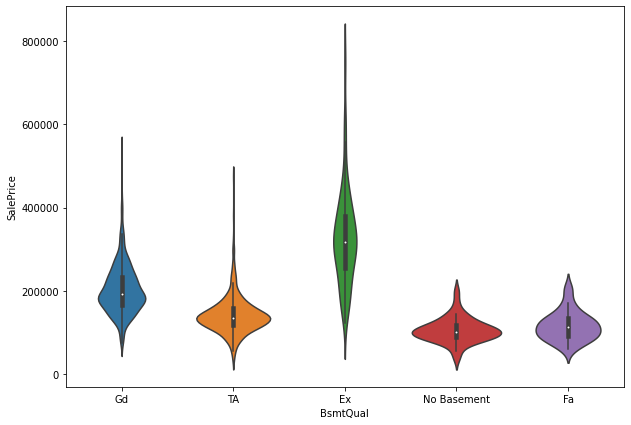

In [53]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["BsmtQual"], y=df_train["SalePrice"])
plt.show()

* BsmtQual tells the height of the basement, BsmtCond tells the condition of the basement.
* BsmtCond will not be used, because most of the houses have Typical/Average as BsmtCond.
* Basement having Excellent height (100+ inches) will have high cost.
* Basement having Good to Typical/Average height (80-99 inches) will have moderate cost.
* Basement having Fair height (70 inches) will have low cost.
* House with no Basement will have low price.

**BsmtExposure**

In [54]:
df_cat["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [55]:
df_cat["BsmtExposure"].isnull().sum()

38

In [56]:
df_cat.loc[:, "BsmtExposure"].fillna("No Basement", inplace=True)
df_cat["BsmtExposure"].isnull().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

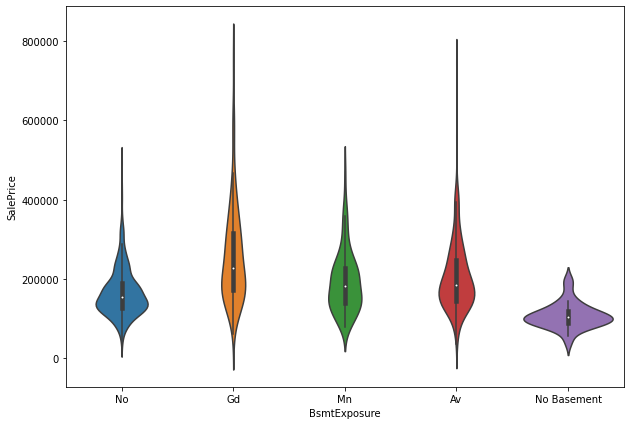

In [57]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["BsmtExposure"], y=df_train["SalePrice"])
plt.show()

* BsmtExposure tells the quality of exposure in the basement.
* Basement having Good to Average exposure have high cost.
* Basement having Minimum to No exposure have moderate cost.
* Houses with no basement have low cost.

**BsmtFinType1 And BsmtFinType2**

In [58]:
df_cat["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [59]:
df_cat["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [60]:
df_cat["BsmtFinType1"].isnull().sum()

37

In [61]:
df_cat.loc[:, "BsmtFinType1"].fillna("No Basement", inplace=True)
df_cat["BsmtFinType1"].isnull().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

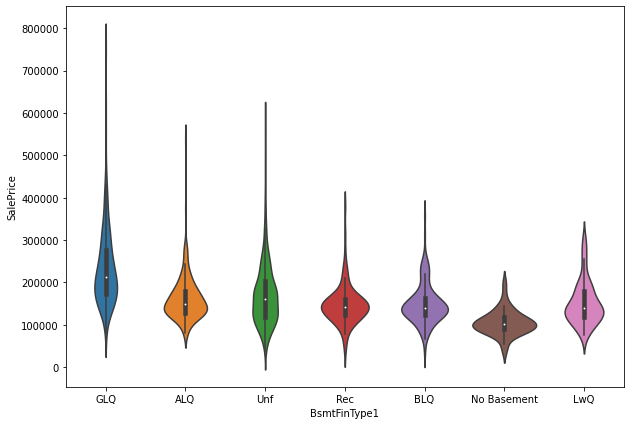

In [62]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["BsmtFinType1"], y=df_train["SalePrice"])
plt.show()

* BsmtFinType1 and BsmtFinType2 (If more than one) tells the rating of basement finished area.
* Basement with rating Good Living Quarters have high price.
* Basement with rating Average Living Quarters, and Unfinished have moderate price.
* Basement with rating Average Rec Room, Below Average Living Quarters, Low Quality have low price.
* House with no basement have low price.
* BsmtFinType2 will be removed, because most of the houses have only one type of BasmtFinType2

**Heating and HeatingQC**

In [63]:
df_cat["HeatingQC"].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

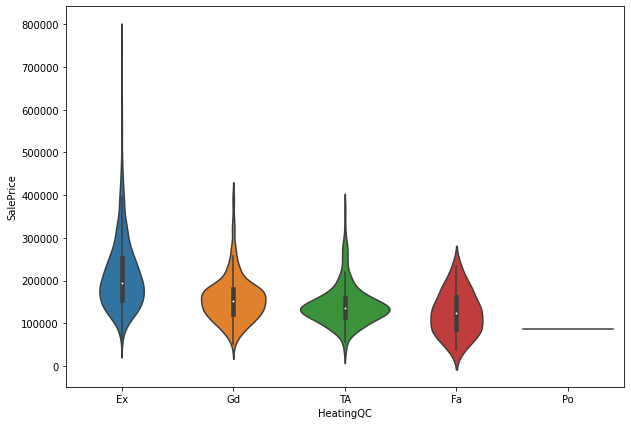

In [64]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["HeatingQC"], y=df_train["SalePrice"])
plt.show()

* Heating gives type of heating used in the house, and HeatingQC tells the quality and condition of the heating.
* Heating feature will not be used because, HeatingQC covers the feature Heating.
* Excellent heating quality have high price.
* Good to Average heating quality have moderate price.
* Fair and Poor heating quality have low prices.

**CentralAir**

In [65]:
df_cat["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

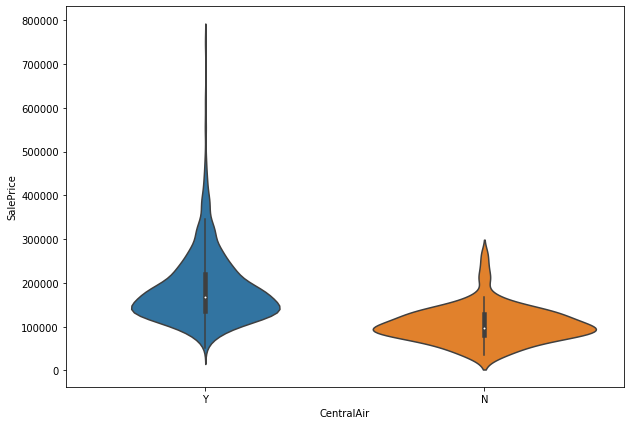

In [66]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["CentralAir"], y=df_train["SalePrice"])
plt.show()

* CentralAir tells wheather the house has central air conditioning or not.
* The houses having central air conditioning have high cost.
* Houses not having central air conditioning have low cost.

**Electrical**

In [67]:
df_cat["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

* Electrical tells the type of electrical system used in the house.
* This feature will not be used because, most of the houses have Standard Circuit Breakers & Romex electrical system.

**KitchenQual**

In [68]:
df_cat["KitchenQual"].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

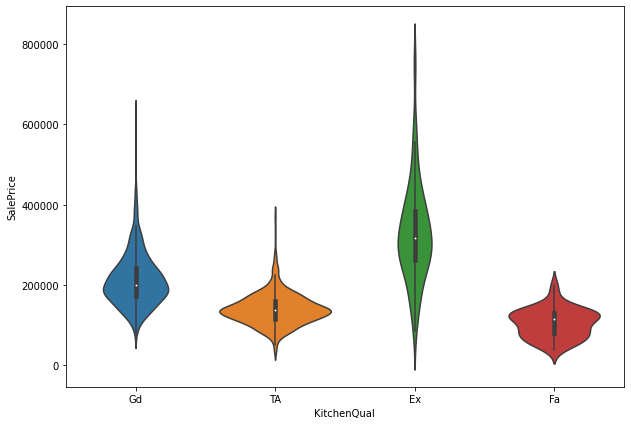

In [69]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["KitchenQual"], y=df_train["SalePrice"])
plt.show()

* KitchenQual tells the quality of kitchen.
* Kitchen with Excellent quality have high price.
* Kitchen with Good - Average quality have moderate price.
* Kitchen with Fair quality have low price.

**Functional**

In [70]:
df_cat["Functional"].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

* Functionality tells the overall functionality of the house.
* This feature will not be used because, almost all of the houses have Typical functionality.

**FireplaceQu**

In [71]:
df_cat["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [72]:
df_cat["FireplaceQu"].isnull().sum()

690

In [73]:
df_cat.loc[:, "FireplaceQu"].fillna("No FirePlace", inplace=True)
df_cat["FireplaceQu"].isnull().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

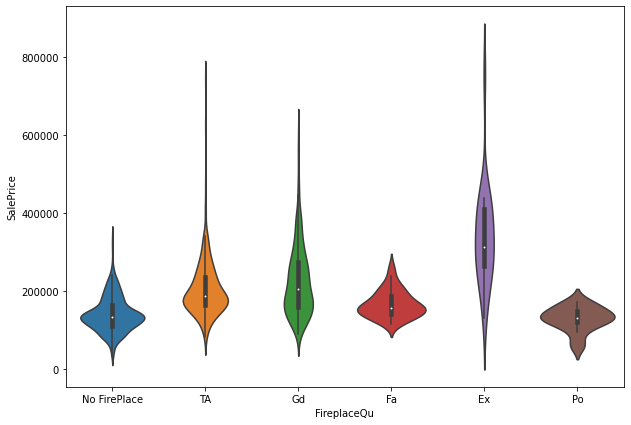

In [74]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["FireplaceQu"], y=df_train["SalePrice"])
plt.show()

* FireplaceQu tells the quality of fireplaces in the house.
* FirePlace with Excellent to Typical quality have high price.
* FirePlace with Good quality have moderate price.
* FirePlace with Fair to Low quality have low price.
* House with no fireplace have low cost.

**GarageType**

In [75]:
df_cat["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [76]:
df_cat["GarageType"].isnull().sum()

81

In [77]:
df_cat.loc[:, "GarageType"].fillna("No Garage", inplace=True)
df_cat["GarageType"].isnull().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

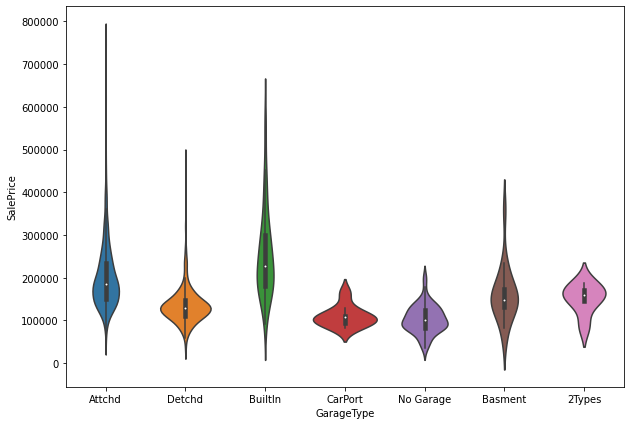

In [78]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["GarageType"], y=df_train["SalePrice"])
plt.show()

* GarageType tells the type of Garage in the house.
* Garage attached to the house have high price.
* Garage Built-in to the house and Garage Detached from house have moderate price.
* Garage with type Basement, Car Port, 2types have low price.
* House with no garage have low price.

**GarageFinish**

In [79]:
df_cat["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [80]:
df_cat["GarageFinish"].isnull().sum()

81

In [81]:
df_cat.loc[:, "GarageFinish"].fillna("No Garage", inplace=True)
df_cat["GarageFinish"].isnull().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

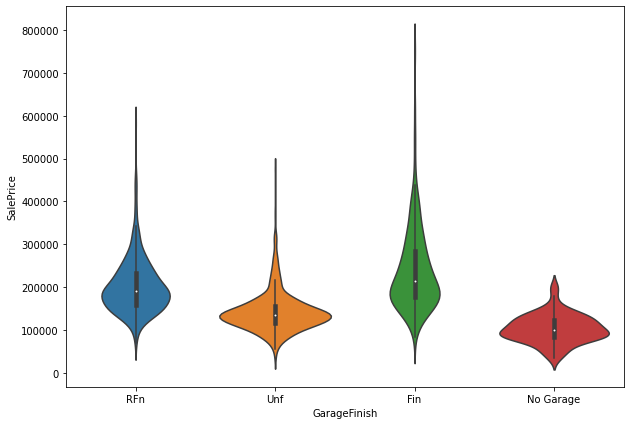

In [82]:
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x=df_cat["GarageFinish"], y=df_train["SalePrice"])
plt.show()

* GarageFinish tells the interior finish of the garage.
* Garage with Finished interior have high price.
* Garage with Rough Finish to Unfinished have moderate price.
* House with no Garage have low price.

**GarageQual And GarageCond**

In [83]:
df_cat["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [84]:
df_cat["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

* GarageQual tells the quality of Garage, and GarageCond tells the condition of Garage.
* Both of the features will not be used, because both have very high number of houses having a single quality and condition.

**PavedDrive**

In [85]:
df_cat["PavedDrive"].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

* PavedDrive tells the type of Driveway.
* This feature will not be used because, very high number of houses have Paved driveway.

**PoolQC**

In [86]:
df_cat["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

* PoolQC tells the quality of Pool in the house.
* This feature will not be used because it has very high number of houses with no pool.

**Fence**

In [87]:
df_cat["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [88]:
df_cat["Fence"].isnull().sum()

1179

* Fence tells the type of fence in the house.
* This feature will not be used because, it has very high number of missing values.

**MiscFeature, SaleType And SaleCondition**

In [89]:
df_cat["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [90]:
df_cat["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [91]:
df_cat["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

* MiscFeatures tells some Miscellaneous features of the house.
* SaleType tells the type of sale of the house.
* SaleCondition tells the Condition of Sale.
* All these features will not be used because of severe imbalance in clasees.

In [92]:
redundant_cat = ["Street", "Utilities", "LandSlope", "Neighborhood", "Condition1", "Condition2", "RoofStyle", "Exterior1st", "Exterior2nd", "ExterQual", "BsmtCond", "BsmtFinType2", "Heating", "Electrical", "Functional", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"]

In [93]:
df_cat_final = df_cat.drop(redundant_cat, axis=1)
df_cat_final.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,BldgType,HouseStyle,RoofMatl,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,RL,No Alley,Reg,Lvl,Inside,1Fam,2Story,CompShg,BrkFace,TA,PConc,Gd,No,GLQ,Ex,Y,Gd,No FirePlace,Attchd,RFn
1,RL,No Alley,Reg,Lvl,FR2,1Fam,1Story,CompShg,None,TA,CBlock,Gd,Gd,ALQ,Ex,Y,TA,TA,Attchd,RFn
2,RL,No Alley,IR1,Lvl,Inside,1Fam,2Story,CompShg,BrkFace,TA,PConc,Gd,Mn,GLQ,Ex,Y,Gd,TA,Attchd,RFn
3,RL,No Alley,IR1,Lvl,Corner,1Fam,2Story,CompShg,None,TA,BrkTil,TA,No,ALQ,Gd,Y,Gd,Gd,Detchd,Unf
4,RL,No Alley,IR1,Lvl,FR2,1Fam,2Story,CompShg,BrkFace,TA,PConc,Gd,Av,GLQ,Ex,Y,Gd,TA,Attchd,RFn


In [94]:
df_train_final = pd.concat([df_cat_final, df_num_final], axis=1)
df_train_final.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,BldgType,HouseStyle,RoofMatl,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageCars,SalePrice
0,RL,No Alley,Reg,Lvl,Inside,1Fam,2Story,CompShg,BrkFace,TA,PConc,Gd,No,GLQ,Ex,Y,Gd,No FirePlace,Attchd,RFn,7,2003,2003,196.0,856,1710,2,0,2,208500
1,RL,No Alley,Reg,Lvl,FR2,1Fam,1Story,CompShg,None,TA,CBlock,Gd,Gd,ALQ,Ex,Y,TA,TA,Attchd,RFn,6,1976,1976,0.0,1262,1262,2,1,2,181500
2,RL,No Alley,IR1,Lvl,Inside,1Fam,2Story,CompShg,BrkFace,TA,PConc,Gd,Mn,GLQ,Ex,Y,Gd,TA,Attchd,RFn,7,2001,2002,162.0,920,1786,2,1,2,223500
3,RL,No Alley,IR1,Lvl,Corner,1Fam,2Story,CompShg,None,TA,BrkTil,TA,No,ALQ,Gd,Y,Gd,Gd,Detchd,Unf,7,1915,1970,0.0,756,1717,1,1,3,140000
4,RL,No Alley,IR1,Lvl,FR2,1Fam,2Story,CompShg,BrkFace,TA,PConc,Gd,Av,GLQ,Ex,Y,Gd,TA,Attchd,RFn,8,2000,2000,350.0,1145,2198,2,1,3,250000


# Handling Missing Values

In [95]:
missing_val = {"# Missing": df_train_final.isnull().sum()}
df_missing = pd.DataFrame(missing_val).sort_values(by = "# Missing", ascending = False)
df_missing

,# Missing
MasVnrArea,8
MSZoning,0
Alley,0
GarageCars,0
Fireplaces,0
FullBath,0
GrLivArea,0
TotalBsmtSF,0
YearRemodAdd,0
YearBuilt,0


In [96]:
df_train_final.loc[:, "MasVnrArea"].fillna(df_train_final["MasVnrArea"].mean(), inplace=True)

# Handling Categorical Features

In [97]:
tar_enc = TargetEncoder()
df_train = tar_enc.fit_transform(df_train_final, df_train_final["SalePrice"])

In [98]:
df_train.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,BldgType,HouseStyle,RoofMatl,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageCars,SalePrice
0,191004.994787,183452.131483,164754.818378,180183.746758,176938.047529,185763.807377,210051.764045,179803.679219,204691.871910,184034.896256,225230.442040,202688.478964,165652.295908,235413.720096,214914.429150,186186.70989,212116.023891,141331.482609,202892.656322,202068.869668,7,2003,2003,196.0,856,1710,2,0,2,208500
1,191004.994787,183452.131483,164754.818378,180183.746758,177934.574468,185763.807377,175985.477961,179803.679219,156958.243119,184034.896256,149805.714511,202688.478964,257689.805970,161573.068182,214914.429150,186186.70989,139962.511565,205723.488818,202892.656322,202068.869668,6,1976,1976,0.0,1262,1262,2,1,2,181500
2,191004.994787,183452.131483,206101.665289,180183.746758,176938.047529,185763.807377,210051.764045,179803.679219,204691.871910,184034.896256,225230.442040,202688.478964,192789.657895,235413.720096,214914.429150,186186.70989,212116.023891,205723.488818,202892.656322,202068.869668,7,2001,2002,162.0,920,1786,2,1,2,223500
3,191004.994787,183452.131483,206101.665289,180183.746758,181623.425856,185763.807377,210051.764045,179803.679219,156958.243119,184034.896256,132291.075342,140759.818182,165652.295908,161573.068182,156858.871369,186186.70989,212116.023891,226351.415789,134091.162791,142156.423140,7,1915,1970,0.0,756,1717,1,1,3,140000
4,191004.994787,183452.131483,206101.665289,180183.746758,177934.574468,185763.807377,210051.764045,179803.679219,204691.871910,184034.896256,225230.442040,202688.478964,206643.420814,235413.720096,214914.429150,186186.70989,212116.023891,205723.488818,202892.656322,202068.869668,8,2000,2000,350.0,1145,2198,2,1,3,250000


* Categorical Features are encoded by Mean Target Encoding.
* In this encoding the categorical feature of a particular value is replaced by the mean of target variable (SalePrice) corresponding to that value.

# Outliers

In [99]:
df_train.describe()

,MSZoning,Alley,LotShape,LandContour,LotConfig,BldgType,HouseStyle,RoofMatl,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageCars,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.285976,180921.195890,180921.166212,180921.195890,180917.615717,180921.195890,180921.010401,180915.262728,180921.196186,180987.717559,180920.445075,180921.195890,180921.195890,180921.195890,180985.525477,180921.195890,180921.195890,180921.195894,180922.157768,180921.195890,6.099315,1971.267808,1984.865753,103.685262,1057.429452,1515.463699,1.565068,0.613014,1.767123,180921.195890
std,26053.828274,11348.757047,21954.805909,12758.892715,11509.247895,14763.064929,23339.081948,13829.777212,34010.009937,11890.477820,40223.709960,54172.202011,30716.660444,36475.306046,35039.622207,19966.138380,53680.953065,43072.253555,39657.112913,43936.353849,1.382997,30.202904,20.645407,180.569112,438.705324,525.480383,0.550916,0.644666,0.747315,79442.502883
min,74541.128343,122219.080000,164754.818378,143104.079365,176938.047529,128432.258065,110150.159966,179803.679219,146318.095440,102595.142857,107365.625008,105652.891892,107938.342105,105652.891892,123919.489796,105264.073684,105565.205128,129764.150287,103317.283951,103317.283951,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,191004.994787,183452.131483,164754.818378,180183.746758,176938.047529,185763.807377,175985.477961,179803.679219,156958.243119,184034.896256,149805.714511,140759.818182,165652.295908,151852.702703,142362.876168,186186.709890,139962.511565,141331.482609,134091.162791,142156.423140,5.000000,1954.000000,1967.000000,0.000000,795.750000,1129.500000,1.000000,0.000000,1.000000,129975.000000
50%,191004.994787,183452.131483,164754.818378,180183.746758,176938.047529,185763.807377,175985.477961,179803.679219,156958.243119,184034.896256,149805.714511,202688.478964,165652.295908,170670.576744,214914.429150,186186.709890,139962.511565,167298.484848,202892.656322,202068.869668,6.000000,1973.000000,1994.000000,0.000000,991.500000,1464.000000,2.000000,1.000000,2.000000,163000.000000
75%,191004.994787,183452.131483,206101.665289,180183.746758,177934.574468,185763.807377,210051.764045,179803.679219,204691.871910,184034.896256,225230.442040,202688.478964,192789.657895,235413.720096,214914.429150,186186.709890,212116.023891,226351.415789,202892.656322,202068.869668,7.000000,2000.000000,2004.000000,164.250000,1298.250000,1776.750000,2.000000,1.000000,2.000000,214000.000000
max,214014.061538,183452.131483,239833.365854,231533.940000,223854.617021,185763.807377,219964.397209,388848.993520,265583.625000,198900.146905,225230.442040,327041.041322,257689.805970,235413.720096,214914.429150,186186.709890,328554.670000,337712.499984,254751.738636,240052.690341,10.000000,2010.000000,2010.000000,1600.000000,6110.000000,5642.000000,3.000000,3.000000,4.000000,755000.000000


**MasVnrArea, TotalBsmtSF, And GrLivArea**

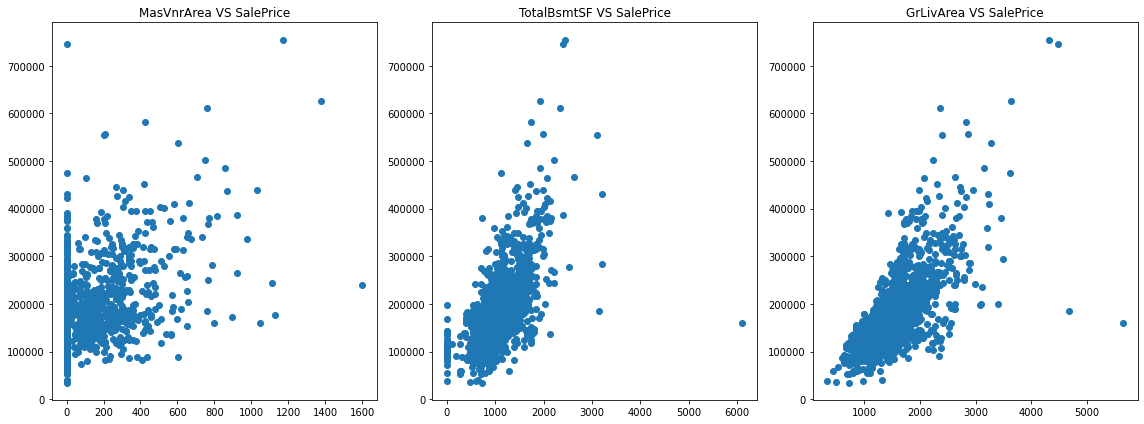

In [100]:
fig = plt.figure(figsize=(16, 6))
plot1 = plt.subplot2grid((1, 3), (0, 0))
plot2 = plt.subplot2grid((1, 3), (0, 1))
plot3 = plt.subplot2grid((1, 3), (0, 2))

plot1.scatter(df_train["MasVnrArea"], df_train["SalePrice"])
plot1.set_title("MasVnrArea VS SalePrice")

plot2.scatter(df_train["TotalBsmtSF"], df_train["SalePrice"])
plot2.set_title("TotalBsmtSF VS SalePrice")

plot3.scatter(df_train["GrLivArea"], df_train["SalePrice"])
plot3.set_title("GrLivArea VS SalePrice")

plt.tight_layout()
plt.show()

* In MasVnrArea, there are 4 observations, which have very low house price, despite having high MasVnrArea.
* In MasVnrArea, there is 1 observations, which have very high house price, despite having low MasVnrArea.
* In TotalBsmtSF, there is 1 obeservation, which have very low house price, despite having high TotalBsmtSF.
* In GrLivArea, there are 2 obeservation., which have very low house price, despite having high GrLivArea.
* These observations can be treated as outliers, and they will be removed from the dataset.

In [101]:
masvnrarea_out1 = df_train[(df_train["MasVnrArea"] > 1000) & (df_train["SalePrice"] < 300000)][["MasVnrArea", "SalePrice"]]
masvnrarea_out2 = df_train[(df_train["MasVnrArea"] < 200) & (df_train["SalePrice"] > 700000)][["MasVnrArea", "SalePrice"]]
totalbsmtsf_out = df_train[(df_train["TotalBsmtSF"] > 5000) & (df_train["SalePrice"] < 200000)][["TotalBsmtSF", "SalePrice"]]
grlivarea_out = df_train[(df_train["GrLivArea"] > 4000) & (df_train["SalePrice"] < 300000)][["GrLivArea", "SalePrice"]]
masvnrarea_out = pd.concat([masvnrarea_out1, masvnrarea_out2])

print("MasVnrArea Outliers: ")
masvnrarea_out

MasVnrArea Outliers: 


,MasVnrArea,SalePrice
70,1115.0,244000
115,1129.0,176000
297,1600.0,239000
808,1047.0,159950
1182,0.0,745000


In [102]:
print("TotalBsmtSF Outliers: ")
totalbsmtsf_out

TotalBsmtSF Outliers: 


,TotalBsmtSF,SalePrice
1298,6110,160000


In [103]:
print("GrLivArea Outliers: ")
grlivarea_out

GrLivArea Outliers: 


,GrLivArea,SalePrice
523,4676,184750
1298,5642,160000


In [104]:
outlier_indices = [70, 115, 297, 808, 1182, 1298, 523]
df_train.drop(outlier_indices, inplace = True)

# Linear Regression Assumptions

In [105]:
y = df_train["SalePrice"]
X = df_train.drop(["SalePrice"], axis=1)

In [106]:
# Normalizing the features in the dataset
feature_names = X.columns
std_scaler = StandardScaler()
X_new = std_scaler.fit_transform(X)

In [107]:
X_final = pd.DataFrame(X_new, columns = feature_names)

In [108]:
X_final.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,BldgType,HouseStyle,RoofMatl,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageCars
0,0.389844,0.221974,-0.733840,-0.062327,-0.345941,0.328821,1.252843,-0.080543,0.705958,0.256226,1.104800,0.410098,-0.493962,1.498937,0.970529,0.264492,0.589445,-0.915426,0.555476,0.485505,0.661814,1.053685,0.879816,0.570077,-0.472609,0.402486,0.797589,-0.949799,0.314955
1,0.389844,0.221974,-0.733840,-0.062327,-0.259520,0.328821,-0.207900,-0.080543,-0.701867,0.256226,-0.771154,0.410098,2.517630,-0.528427,0.970529,0.264492,-0.763456,0.579155,0.555476,0.485505,-0.066131,0.159987,-0.427462,-0.590763,0.510870,-0.489980,0.797589,0.611352,0.314955
2,0.389844,0.221974,1.151326,-0.062327,-0.345941,0.328821,1.252843,-0.080543,0.705958,0.256226,1.104800,0.410098,0.394009,1.498937,0.970529,0.264492,0.589445,0.579155,0.555476,0.485505,0.661814,0.987485,0.831398,0.368707,-0.317578,0.553887,0.797589,0.611352,0.314955
3,0.389844,0.221974,1.151326,-0.062327,0.060386,0.328821,1.252843,-0.080543,-0.701867,0.256226,-1.206776,-0.739794,-0.493962,-0.528427,-0.686545,0.264492,0.589445,1.057943,-1.180320,-0.879293,0.661814,-1.859109,-0.717968,-0.590763,-0.714845,0.416431,-1.024576,0.611352,1.653054
4,0.389844,0.221974,1.151326,-0.062327,-0.259520,0.328821,1.252843,-0.080543,0.705958,0.256226,1.104800,0.410098,0.847323,1.498937,0.970529,0.264492,0.589445,0.579155,0.555476,0.485505,1.389758,0.954385,0.734563,1.482165,0.227454,1.374637,0.797589,0.611352,1.653054


**Linearity, Homoskedasticity And Normaility of Residuals**

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, train_size = 0.8)

In [110]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
print("The coefficient of determination on the train set is " + str(round(lr_reg.score(X_train, y_train), 2)))

The coefficient of determination on the train set is 0.87


In [111]:
y_pred = lr_reg.predict(X_train)
residuals = y_train - y_pred

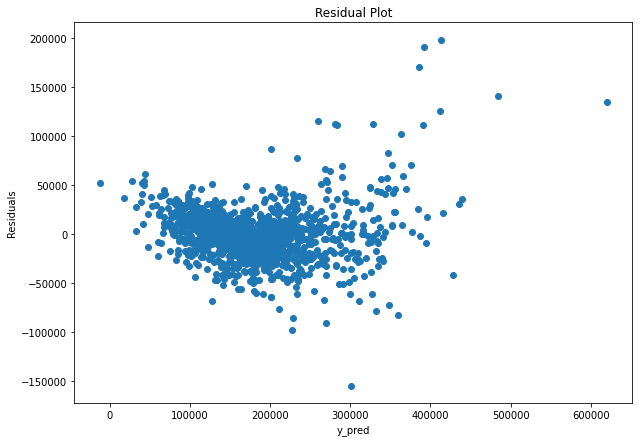

In [112]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_pred, residuals)
plt.xlabel("y_pred")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

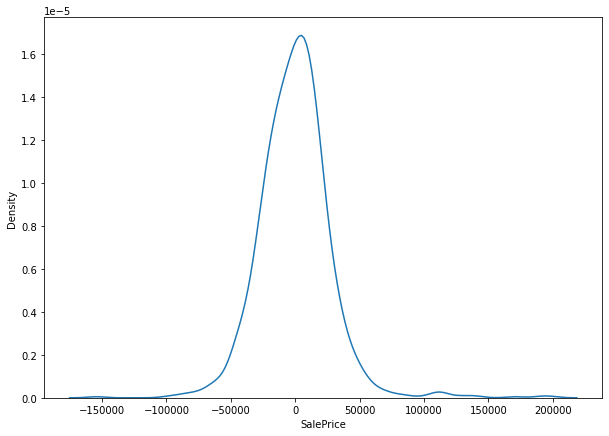

In [113]:
fig = plt.figure(figsize=(10, 7))
sns.kdeplot(residuals)
plt.show()

* The data is almost linear, so no need to use polynomial features.
* The residuals also have almost constant variance, so the model obeys Homoskedasticity
* The residual distribution looks like a normal distribution.
* All assumptions hold!

# Creating the Model

In [114]:
alpha_values = list(range(0, 101))

kf = KFold(n_splits=5)

mse_cv = []

for alpha in alpha_values:
    total_mse_cv = []
    for train_index, test_index in kf.split(X_train):
        X_tr , X_cv = X_train.iloc[train_index,:],X_train.iloc[test_index,:]
        y_tr , y_cv = y_train.iloc[train_index] , y_train.iloc[test_index]
        model = Ridge(alpha=alpha)
        model.fit(X_tr, y_tr)
        
        y_tr_pred = model.predict(X_tr)
        y_cv_pred = model.predict(X_cv)
        
        mse_cv_score = metrics.mean_squared_error(y_cv, y_cv_pred)
        
        total_mse_cv.append(mse_cv_score)
        
    avg_mse_cv = (sum(total_mse_cv)) / len(total_mse_cv)
    
    mse_cv.append(avg_mse_cv)
    
    
optimal_alpha = mse_cv.index(min(mse_cv))
print("Optimal Value of alpha: " + str(optimal_alpha))

Optimal Value of alpha: 26


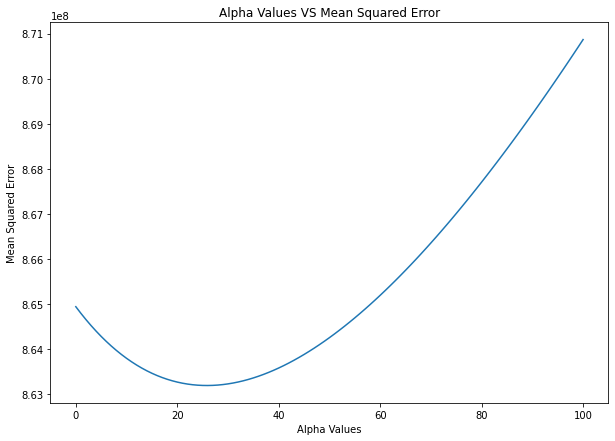

In [115]:
fig = plt.figure(figsize=(10, 7))
plt.plot(alpha_values, mse_cv)
plt.xlabel("Alpha Values")
plt.ylabel("Mean Squared Error")
plt.title("Alpha Values VS Mean Squared Error")
plt.show()

In [116]:
model = Ridge(alpha=27)
model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)

print("Coefficient of determination on the test set is: " + str(round(score_test, 2)))

Coefficient of determination on the test set is: 0.86
